In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Problem 1
See PDF solution in eClass

# Problem 2
Code a 2D velocity jump process with directions left, right, up, and down, each with the same speed (magnitude of velocity). Suppose that each of the four velocity states can transition to any of the other three states (all to all transitions with 12 distinct transition rates). For simplicity, set $X(0) = 0$.

  1. Create a rule for restricting the transition rates such that the process is unbiased as $t\to\infty$. Recall that unbiased means that $$\lim_{t\to\infty}E[X(t) - X(0)] = 0.$$ The most trivial example is to set all the transition rates to the same value $k$.
  2. Turn in a few graphs of sample trajectories ($10^4$ transitions long) for choices of transition rates that fit your rule. 
  3. (Bonus) is this the most general possible rule? How do you know?

*Hint: start with the '1D velocity jump process' section of the Week 8 Jupyter notebook as a template for your code.*

**Please turn in a screen shot of your code along with your solution.**

## Detailed balance
$$ k_{ij} = k_{ji}, \quad i,j\in \{R, L, U, D\}$$

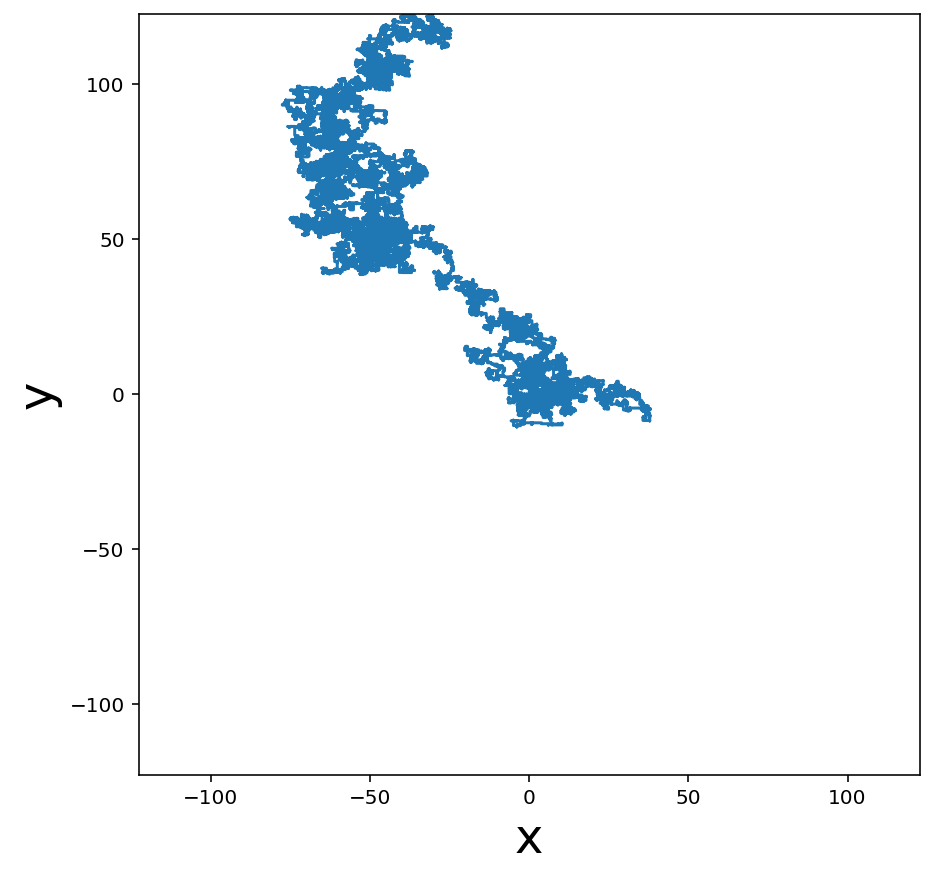

In [2]:
k = 2.
v = 1.

krl = klr = k*rand(1)[0]
kru = kur = k*rand(1)[0]
krd = kdr = k*rand(1)[0]
klu = kul = k*rand(1)[0]
kld = kdl = k*rand(1)[0]
kud = kdu = k*rand(1)[0]



Nsteps = 50000
T = zeros(Nsteps)
N = zeros(Nsteps, int64) # velocity state (0, 1, 2, 3)
X = zeros(Nsteps)
Y = zeros(Nsteps)

A = array([
    [-(krl + kru + krd), klr, kur, kdr],
    [krl, -(klr + klu + kld), kul, kdl],
    [kru, klu, -(kur + kul + kud), kdu],
    [krd, kld, kud, -(kdr + kdl + kdu)]
    ])
Vx = array([v, -v, 0, 0])
Vy = array([0, 0, v, -v])

for j in arange(1, Nsteps):
    n = N[j-1]
    u = rand(1)[0]
    combined_rate = -A[n, n]
    tau = -log(u)/combined_rate
    T[j] = T[j-1] + tau
    out_states = array([j for j in arange(4) if j != n])
    probability_vector = A[out_states, n]
    probability_vector = probability_vector/sum(probability_vector)
    cumulative_probability = cumsum(probability_vector)
    u2 = rand(1)
    if u2 < cumulative_probability[0]:
        N[j] = out_states[0]
    elif u2 < cumulative_probability[1]:
        N[j] = out_states[1]
    else:
        N[j] = out_states[2]
    X[j] = X[j-1] + Vx[n]*tau
    Y[j] = Y[j-1] + Vy[n]*tau
    
figure(1, [7, 7])
plot(X, Y);
r = max(absolute(X).max(), absolute(Y).max())
xlim(-r, r)
ylim(-r, r);
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

## The "tornado"
An example that breaks detailed balance:
$$k_{UR} = k_{RD} = k_{DL} = k_{LU} = k,$$
with all other transition rates set to zero.

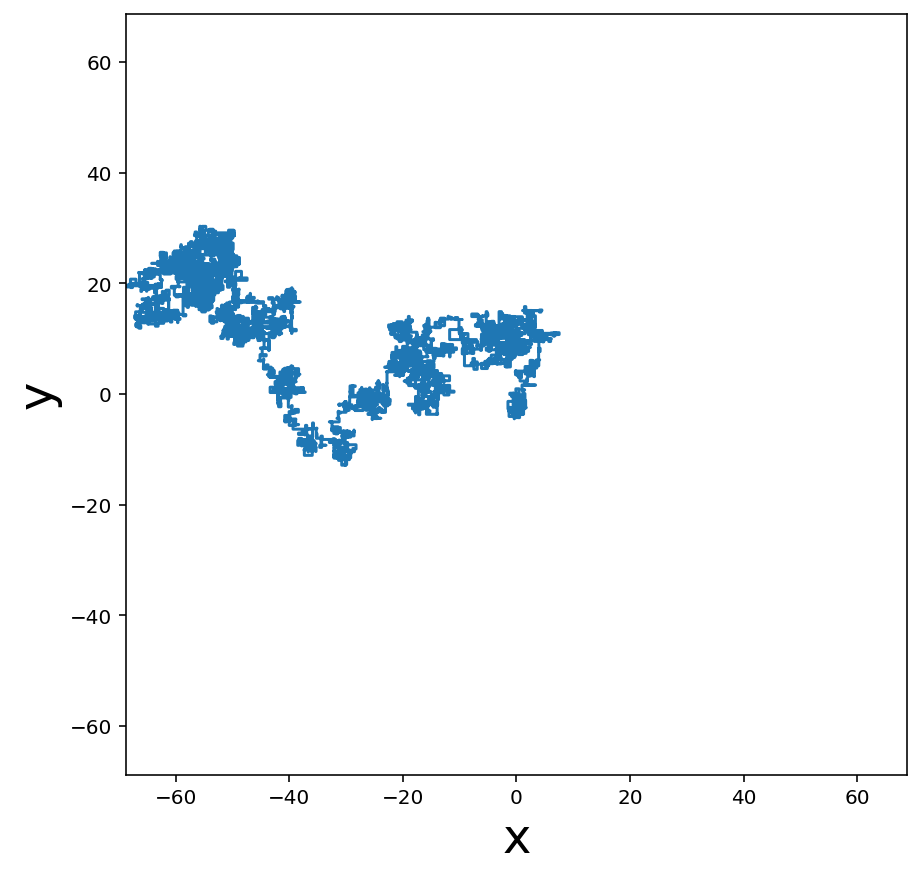

In [3]:
k = 2.
v = 1.
kur = krd = kdl = klu = k
kul = kld = kdr = kru = 0.
kud = kdu = 0.
krl = klr = 0.

Nsteps = 10000
T = zeros(Nsteps)
N = zeros(Nsteps, int64) # velocity state (0, 1, 2, 3)
X = zeros(Nsteps)
Y = zeros(Nsteps)

A = array([ ## transition rate matrix (from the master equation)
    [-(krl + kru + krd), klr, kur, kdr],
    [krl, -(klr + klu + kld), kul, kdl],
    [kru, klu, -(kur + kul + kud), kdu],
    [krd, kld, kud, -(kdr + kdl + kdu)]
    ])
Vx = array([v, -v, 0, 0])
Vy = array([0, 0, v, -v])

for j in arange(1, Nsteps):
    n = N[j-1]
    u = rand(1)[0]
    combined_rate = -A[n, n]
    tau = -log(u)/combined_rate
    T[j] = T[j-1] + tau
    out_states = array([j for j in arange(4) if j != n])
    probability_vector = A[out_states, n]
    probability_vector = probability_vector/sum(probability_vector)
    cumulative_probability = cumsum(probability_vector)
    u2 = rand(1)
    if u2 < cumulative_probability[0]:
        N[j] = out_states[0]
    elif u2 < cumulative_probability[1]:
        N[j] = out_states[1]
    else:
        N[j] = out_states[2]
    X[j] = X[j-1] + Vx[n]*tau
    Y[j] = Y[j-1] + Vy[n]*tau
    
figure(1, [7, 7])
plot(X, Y);
r = max(absolute(X).max(), absolute(Y).max())
xlim(-r, r)
ylim(-r, r);
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

## The "tango"
An example where the stationary distribution (over the four states) is not uniform:
$$ 
\begin{gather*}
k_{UR} = k_{UL} = k_{DR} = k_{DL} = k\\
k_{UD} = k_{DU} = k\\
k_{RU} = k_{RD} = k_{LU} = k_{LD} = \epsilon \\
k_{RL} = k_{LR} = 0
\end{gather*}
$$

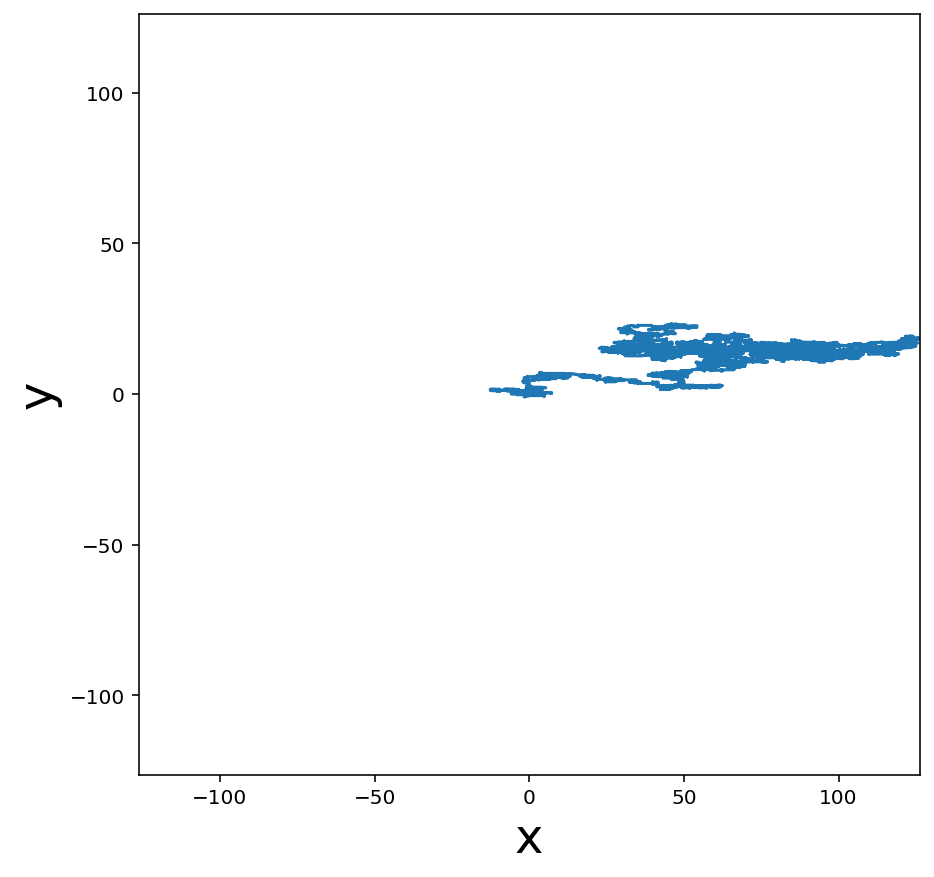

In [4]:
k = 2.
epsilon = 0.5
v = 1.
kur = kul = kdr = kdl = k
kud = kdu = k
kru = krd = klu = kld = epsilon
krl = klr = 0


Nsteps = 10000
T = zeros(Nsteps)
N = zeros(Nsteps, int64) # velocity state (0, 1, 2, 3)
X = zeros(Nsteps)
Y = zeros(Nsteps)

A = array([
    [-(krl + kru + krd), klr, kur, kdr],
    [krl, -(klr + klu + kld), kul, kdl],
    [kru, klu, -(kur + kul + kud), kdu],
    [krd, kld, kud, -(kdr + kdl + kdu)]
    ])
Vx = array([v, -v, 0, 0])
Vy = array([0, 0, v, -v])

for j in arange(1, Nsteps):
    n = N[j-1]
    u = rand(1)[0]
    combined_rate = -A[n, n]
    tau = -log(u)/combined_rate
    T[j] = T[j-1] + tau
    out_states = array([j for j in arange(4) if j != n])
    probability_vector = A[out_states, n]
    probability_vector = probability_vector/sum(probability_vector)
    cumulative_probability = cumsum(probability_vector)
    u2 = rand(1)
    if u2 < cumulative_probability[0]:
        N[j] = out_states[0]
    elif u2 < cumulative_probability[1]:
        N[j] = out_states[1]
    else:
        N[j] = out_states[2]
    X[j] = X[j-1] + Vx[n]*tau
    Y[j] = Y[j-1] + Vy[n]*tau
    
figure(1, [7, 7])
plot(X, Y);
r = max(absolute(X).max(), absolute(Y).max())
xlim(-r, r)
ylim(-r, r);
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

# Problem 3
Consider the Ornstein-Uhlenbeck process, which models Brownian motion within a quadratic potential (ie a tethered particle attached to a spring with constant $k>0$). The process is given by the SDE,
$$ dX(t) = -kX(t)dt + dW(t), \quad X(0) = 0.$$

  1. Use Euler's method to simulate this process for any choice of parameter $k>0$.
  2. Set $k=1.25$ and generate a sufficiently long trajectory such that the histogram `hist(x, bins=50)` converges to a reasonably smooth histogram. What distribution does this look like?
  3. Repeat part 2 for different choices of $k$. How does changing $k$ affect the histogram? Can you guess what the stationary density function is?

*Hint: start with the 'The Euler-Maruyama method for sampling an SDE' section of the Week 7 Jupyter notebook as a template for your code.*

**Please turn in a screen shot of your code along with your solution.**

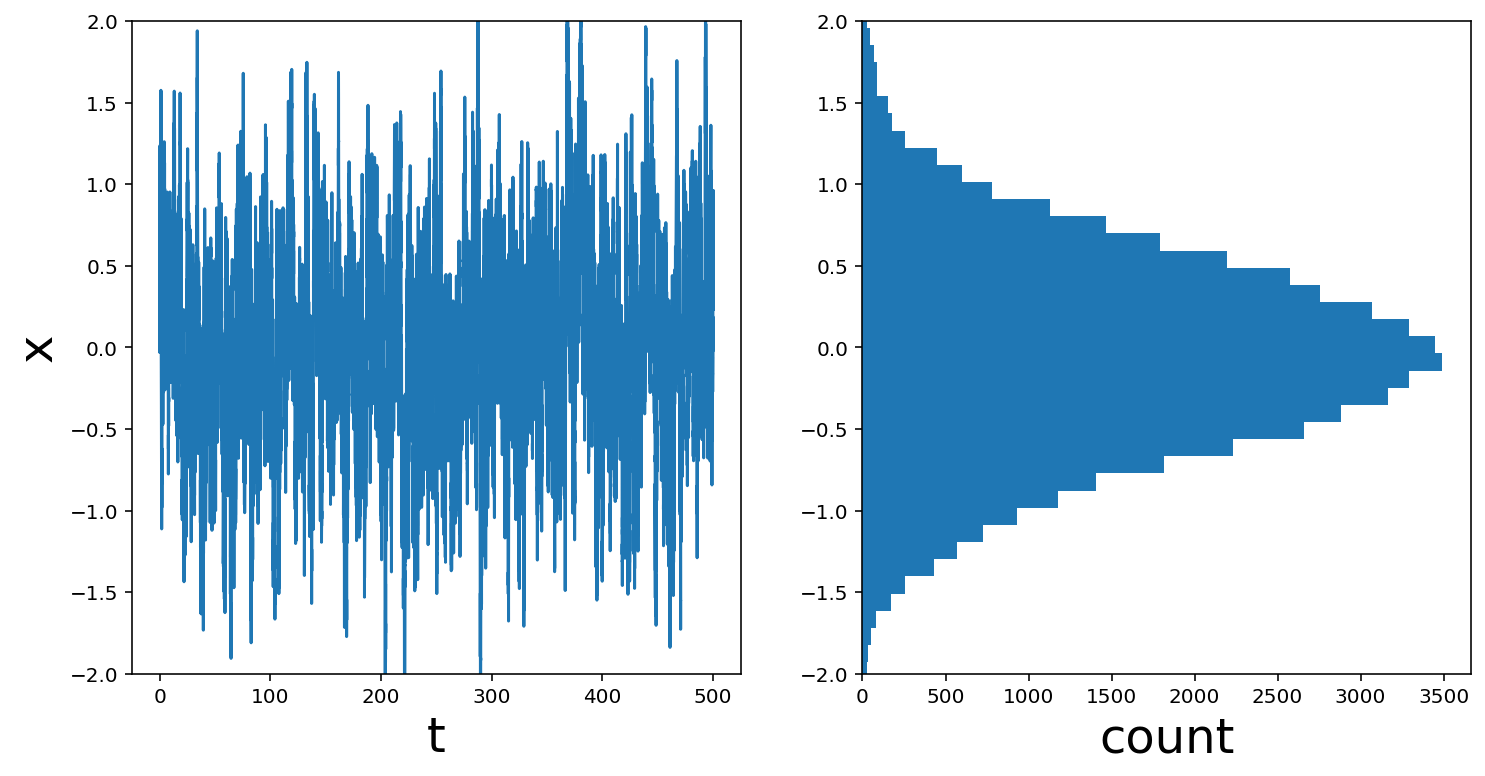

In [5]:
k = 1.25
dt = 0.01
x0 = 0
Nsteps = 50000
X = zeros(Nsteps)
X[0] = x0
for j in arange(1, Nsteps):
    X[j] = X[j-1] -k*X[j-1]*dt + sqrt(dt)*normal(0, 1, 1)
T = arange(Nsteps)*dt

fig = figure(1, [12, 6])
fig.add_subplot(122)
H, b = histogram(X, bins=50)
barh(b[:-1], H, height=b[1]-b[0])
ylim(-2, 2)
xlabel('count', fontsize=24)

fig.add_subplot(121)
plot(T, X)
ylim(-2, 2)
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);

The histogram is Gaussian with mean zero

## A smaller value of $k$

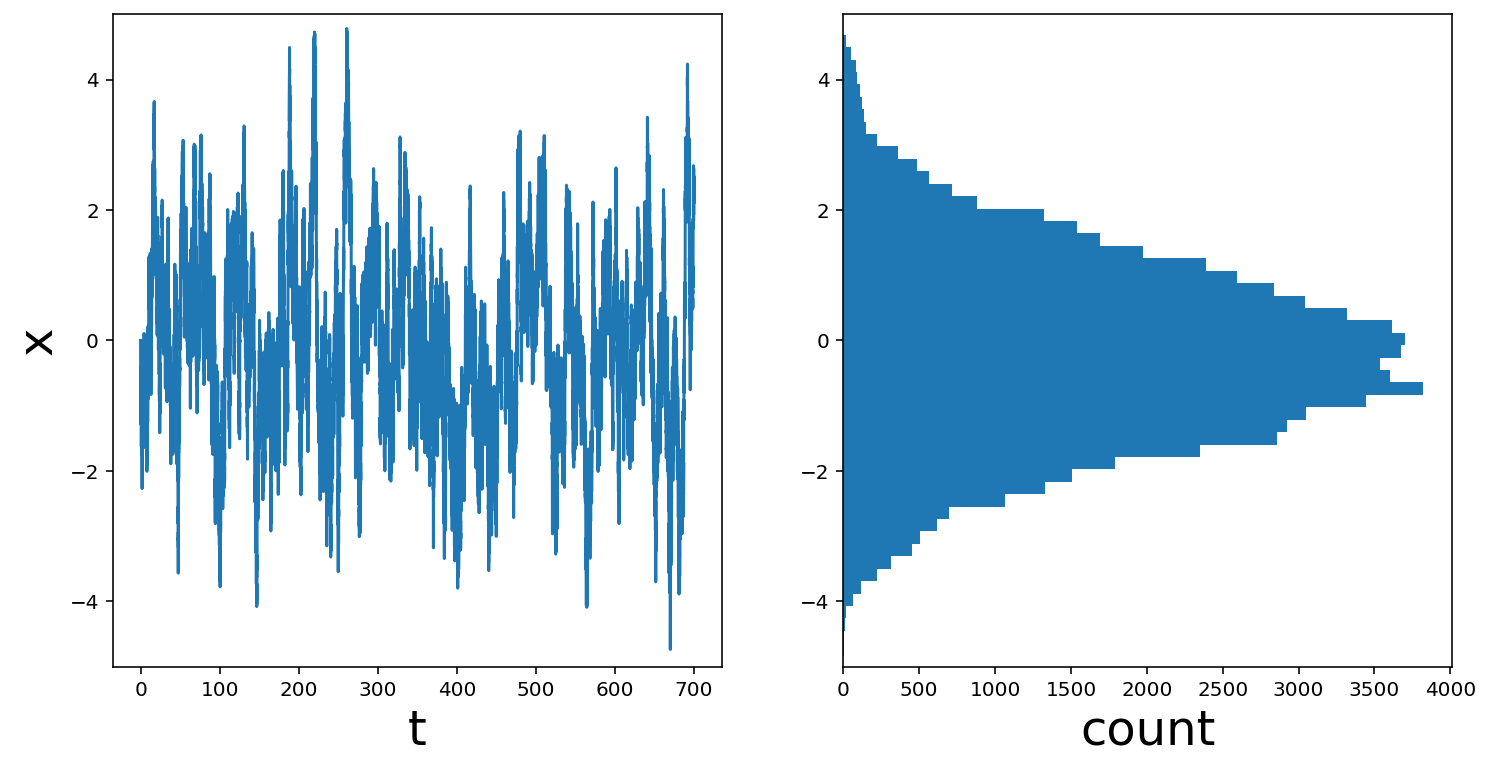

In [6]:
k = .25
dt = 0.01
x0 = 0
Nsteps = 70000
X = zeros(Nsteps)
X[0] = x0
for j in arange(1, Nsteps):
    X[j] = X[j-1] -k*X[j-1]*dt + sqrt(dt)*normal(0, 1, 1)
T = arange(Nsteps)*dt

fig = figure(1, [12, 6])
fig.add_subplot(122)
H, b = histogram(X, bins=50)
barh(b[:-1], H, height=b[1]-b[0])
ylim(-5, 5)
xlabel('count', fontsize=24)

fig.add_subplot(121)
plot(T, X)
ylim(-5, 5)
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);

## A larger value of $k$

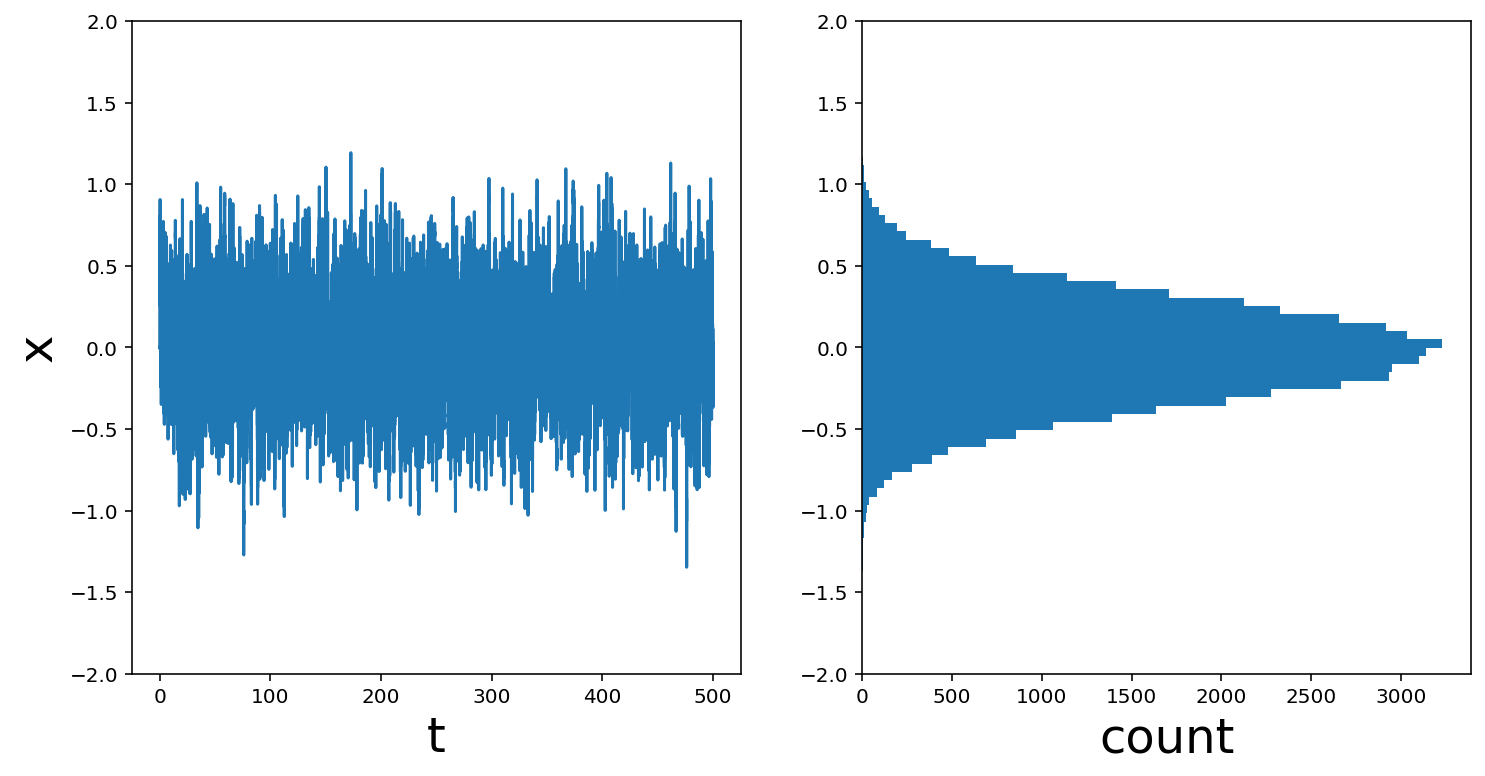

In [7]:
k = 5
dt = 0.01
x0 = 0
Nsteps = 50000
X = zeros(Nsteps)
X[0] = x0
for j in arange(1, Nsteps):
    X[j] = X[j-1] -k*X[j-1]*dt + sqrt(dt)*normal(0, 1, 1)
T = arange(Nsteps)*dt

fig = figure(1, [12, 6])
fig.add_subplot(122)
H, b = histogram(X, bins=50)
barh(b[:-1], H, height=b[1]-b[0])
ylim(-2, 2)
xlabel('count', fontsize=24)

fig.add_subplot(121)
plot(T, X)
ylim(-2, 2)
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);

The parameter $k$ controls the width of the Gaussian. The standard Gaussian (or "normal") distribution (with mean zero) is
$$ G(x;\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-x^2}{2\sigma^2}}, $$
where $\sigma>0$ is the standard devation.
But we do not have a parameter $\sigma$ in our SDE, we only have a parameter $k$.
There should be some relationship between $\sigma$ and $k$ which gives us the formula for the histogram (i.e., the stationary distribution).
Given the observations above, we can surmise that $\sigma$ is inversly proportional to $k$.
It turns out that the relationship is in fact given by 
$$\sigma^2 = \frac{1}{2k}.$$
One can check that the stationary distribution is given by
$$ p(x; k) = \sqrt{\frac{k}{\pi}}e^{-kx^2}.$$

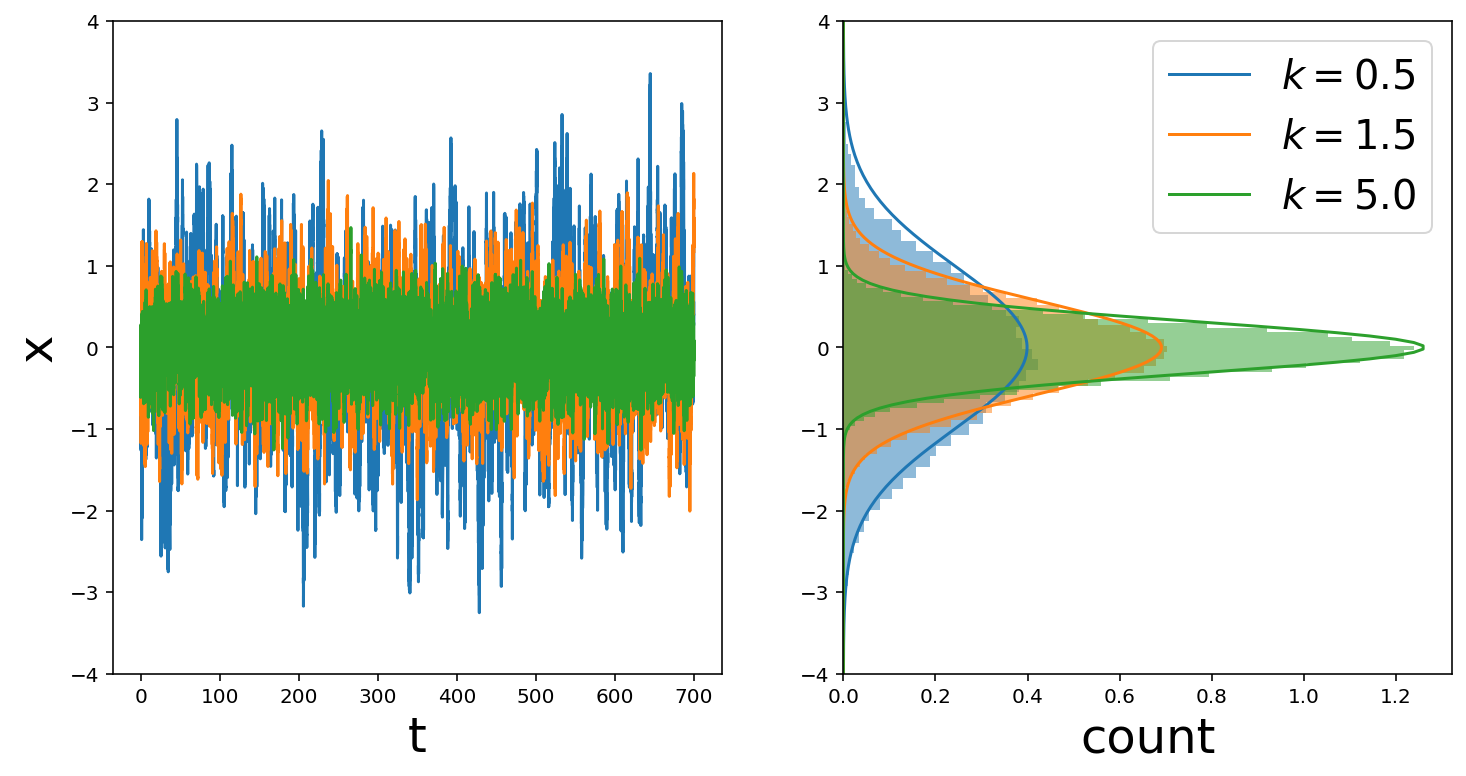

In [9]:
def OU_process(k):
    dt = 0.01
    x0 = 0
    Nsteps = 70000
    X = zeros(Nsteps)
    X[0] = x0
    for j in arange(1, Nsteps):
        X[j] = X[j-1] -k*X[j-1]*dt + sqrt(dt)*normal(0, 1, 1)
    T = arange(Nsteps)*dt
    return T, X
def stationary_distribution(k, x):
    return sqrt(k/pi)*exp(-k*x**2)

fig = figure(1, [12, 6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
x = linspace(-4, 4, 200)

for k in [0.5, 1.5, 5.]:
    T, X = OU_process(k)
    p = stationary_distribution(k, x)
    H, b = histogram(X, bins=50, density=True)
    
    sca(ax1)
    plot(T, X)
    ylim(-4, 4)
    xlabel('t', fontsize=24)
    ylabel('x', fontsize=24);
    
    sca(ax2)
    barh(b[:-1], H, height=b[1]-b[0], alpha=0.5)
    plot(p, x, label=r'$k={0}$'.format(k))
    ylim(-4, 4)
    xlabel('count', fontsize=24);
legend(fontsize=20);